In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise Pandas

For these exercices we are using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/kernels) provided by Airbnb for a Kaggle competition. It describes its offer for New York City in 2019, including types of appartments, price, location etc.

## 1. Create a dataframe 
Create a dataframe of a few lines with objects and their poperties (e.g fruits, their weight and colour).
Calculate the mean of your Dataframe.

In [3]:
data = {
    'Fruit': ['Apple', 'Banana', 'Cherry', 'Orange'],
    'Weight': [150, 120, 10, 130],       # in grams
    'Color': ['Red', 'Yellow', 'Red', 'Orange']
}
df = pd.DataFrame(data)
print("DataFrame:")
print(df)
mean_values = df.mean(numeric_only=True)
print("\nMean values:")
print(mean_values)


DataFrame:
    Fruit  Weight   Color
0   Apple     150     Red
1  Banana     120  Yellow
2  Cherry      10     Red
3  Orange     130  Orange

Mean values:
Weight    102.5
dtype: float64


## 2. Import
- Import the table called ```AB_NYC_2019.csv``` as a dataframe. It is located in the Datasets folder. Have a look at the beginning of the table (head).

- Create a histogram of prices

In [4]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


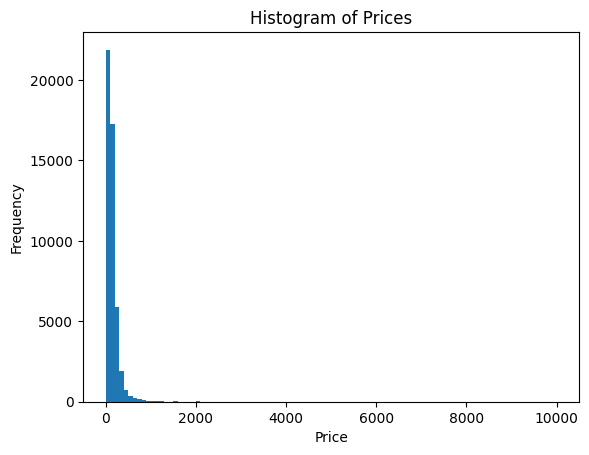

In [5]:
plt.hist(df['price'], bins=100)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Prices")
plt.show()

## 3. Operations

Create a new column in the dataframe by multiplying the "price" and "availability_365" columns to get an estimate of the maximum yearly income.

In [6]:
df['estimate_y_income'] = df['price'] * df['availability_365']

## 3b. Subselection and plotting
Create a new Dataframe by first subselecting yearly incomes between 1 and 100'000. Then make a scatter plot of yearly income versus number of reviews 

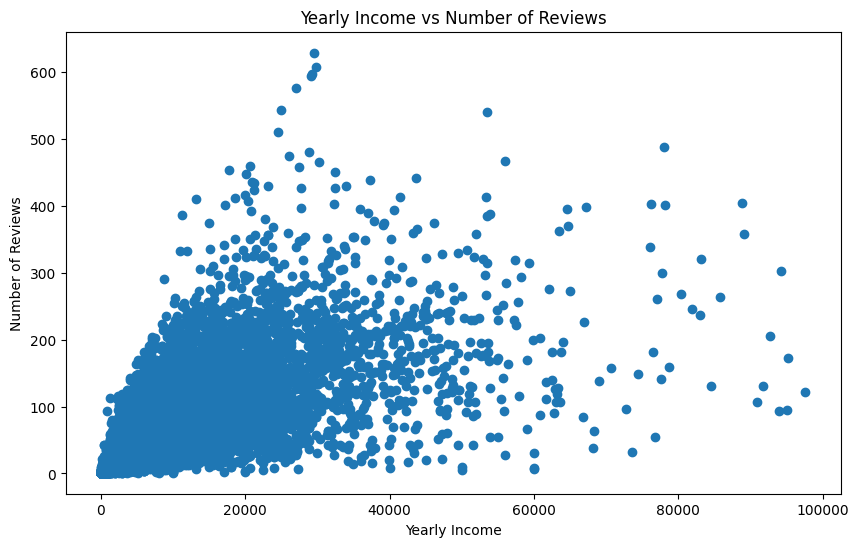

In [7]:
df['yearly_income'] = df['price'] * df['number_of_reviews']
filtered_df = df[(df['yearly_income'] >1) & (df['yearly_income'] < 100000)]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['yearly_income'], filtered_df['number_of_reviews'])
plt.xlabel("Yearly Income")
plt.ylabel("Number of Reviews")
plt.title("Yearly Income vs Number of Reviews")
plt.show()


## 4. Combine

We provide below and additional table that contains the number of inhabitants of each of New York's boroughs ("neighbourhood_group" in the table). Use ```merge``` to add this population information to each element in the original dataframe.

## 5. Groups

- Using ```groupby``` calculate the average price for each type of room (room_type) in each neighbourhood_group. What is the average price for an entire home in Brooklyn ?
- Unstack the multi-level Dataframe into a regular Dataframe with ```unstack()``` and create a bar plot with the resulting table


## 6. Advanced plotting

Using Seaborn, create a scatter plot where x and y positions are longitude and lattitude, the color reflects price and the shape of the marker the borough (neighbourhood_group). Can you recognize parts of new york ? Does the map make sense ?